In [111]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import mplhep as hep


hep.style.use("CMS")
import matplotlib
matplotlib.rc('font', size=13)
results = pickle.load(open("/eos/user/g/gkrzmanc/summ_results/frac_energy_plots/temporary_22082023_with_reco_frac.pkl", "rb"))
#results = pickle.load(open("/eos/user/g/gkrzmanc/summ_results/frac_energy_plots/temporary_22082023_with_reco_count_NOT_known_particles1.pkl", "rb"))
#fname = "/eos/user/g/gkrzmanc/summ_results/frac_energy_plots/temporary_22082023_with_reco_count_known_particles1.pkl"
fname = "/eos/user/g/gkrzmanc/summ_results/frac_energy_plots/23_08_larger_DS_known_particle_ckpts/temp_ckpt.pkl"
#fname = "/eos/user/g/gkrzmanc/summ_results/frac_energy_plots/25_08_train_qmin05/temp_ckpt.pkl"
results = pickle.load(open(fname, "rb"))
#results = pickle.load(open("/eos/user/g/gkrzmanc/summ_results/frac_energy_plots/23_08_larger_DS_known_particle_ckpts/temp_ckpt.pkl", "rb"))
result = results

In [112]:
files = {
    "qmin=3,EGNN": "/eos/user/g/gkrzmanc/summ_results/frac_energy_plots/23_08_larger_DS_known_particle_ckpts/temp_ckpt.pkl",
    "qmin=0.5,pretrained_qmin=3,EGNN": "/eos/user/g/gkrzmanc/summ_results/frac_energy_plots/25_08_train_qmin05_pretrained_qmin3_really/temp_ckpt.pkl",
    "qmin=0.5,EGNN": "/eos/user/g/gkrzmanc/summ_results/frac_energy_plots/25_08_train_qmin05_pretrained_qmin3/temp_ckpt.pkl",
    "qmin=3,EGNN+GAT": "/eos/user/g/gkrzmanc/summ_results/frac_energy_plots/25_08_train_with_gat_egnn_mixed_inf/temp_ckpt.pkl",
}

files = {
    "qmin=3,EGNN,dynRad": "/eos/user/g/gkrzmanc/summ_results/frac_energy_plots1/dynamic_radius_EGNN_qmin3_minrad01/temp_ckpt.pkl",
    "qmin=3,EGNN": "/eos/user/g/gkrzmanc/summ_results/frac_energy_plots/23_08_larger_DS_known_particle_ckpts/temp_ckpt.pkl"
}

result = {key: pickle.load(open(value, "rb")) for key, value in files.items()}


In [113]:
def getEffSigma(data_for_hist, percentage=0.683, bins=100):
    bins = np.linspace(0, 200, bins+1)
    theHist, bin_edges = np.histogram(data_for_hist, bins=bins, density=True)
    wmin = 0.01
    wmax = 200.
    epsilon = 0.01
    point = wmin
    weight = 0.0
    points = []
    sums = []
    # fill list of bin centers and the integral up to those point
    for i in range(len(bin_edges) - 1):
        weight += theHist[i] * (bin_edges[i + 1] - bin_edges[i])
        points.append([(bin_edges[i + 1] + bin_edges[i]) / 2, weight])
        sums.append(weight)

    low = wmin
    high = wmax
    width = 200
    for i in range(len(points)):
        for j in range(i, len(points)):
            wy = points[j][1] - points[i][1]
            # print(wy)
            if abs(wy - percentage) < epsilon:
                # print("here")
                wx = points[j][0] - points[i][0]
                if wx < width:
                    low = points[i][0]
                    high = points[j][0]
                    # print(points[j][0], points[i][0], wy, wx)
                    width = wx
                    ii = i
                    jj = j
    # print(low, high)
    #print(low, high)
    return 0.5 * (high - low), low, high


In [114]:
data = data.clip(0, 2)
plt.hist(data, bins=500)

getEffSigma(data, percentage=0.683, bins=100)


AttributeError: 'list' object has no attribute 'clip'

In [115]:
result.keys()

dict_keys(['qmin=3,EGNN,dynRad', 'qmin=3,EGNN'])

In [116]:
for key in result:
    print(key, result[key]["total_counts"])
    print(result[key].keys())
    # print(sum(result["total_counts"].values()))

qmin=3,EGNN,dynRad {211: 12934.0, -2212: 14462.0, 130: 29165.0, 2112: 25701.0, 2212: 12838.0, -211: 12705.0}
dict_keys(['loss_e_fracs_nopart', 'loss_e_fracs_true_nopart', 'loss_e_fracs', 'loss_e_fracs_true', 'part_E_true', 'part_PID_true', 'reco_counts', 'non_reco_counts', 'total_counts'])
qmin=3,EGNN {2112: 47216.0, -211: 23168.0, 2212: 22376.0, -2212: 25431.0, 130: 55473.0, 211: 22752.0}
dict_keys(['loss_e_fracs', 'loss_e_fracs_true', 'part_E_true', 'part_PID_true', 'reco_counts', 'non_reco_counts', 'total_counts'])


In [117]:
particle_colors = {2112: "red", -211: "green", 2212: "blue", -2212: "purple", 130: "gray", 211: "orange"}


In [118]:
def divide_dicts(num, denom):
    d = {}
    for k in num.keys():
        if denom[k] == 0 or k not in denom:
            d[k] = "inf"
        else:
            d[k] = num[k] / denom[k]
    return d
res = {key: divide_dicts(val["reco_counts"], val["total_counts"]) for key, val in result.items()}
print("Efficiency per particle type:", res)

Efficiency per particle type: {'qmin=3,EGNN,dynRad': {211: 0.36013607546002785, -2212: 0.3575577375190154, 2112: 0.3563674565192016, 2212: 0.35449446954354263, 130: 0.35213440768043885, -211: 0.3557654466745376}, 'qmin=3,EGNN': {2112: 1.0, -211: 1.0, 2212: 1.0, -2212: 1.0, 130: 1.0, 211: 1.0}}


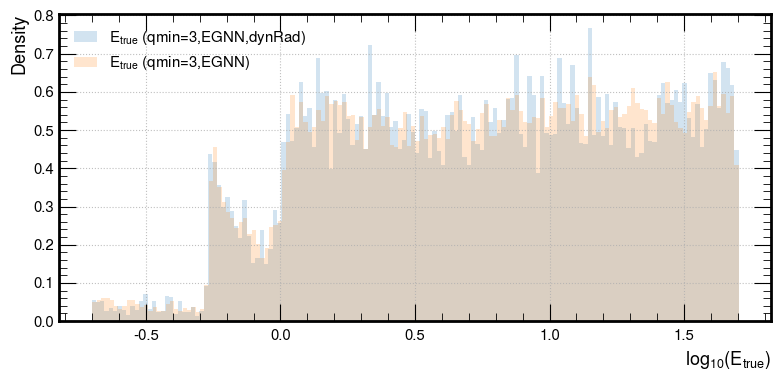

In [119]:
fig, ax = plt.subplots(figsize=(8, 4))
for key, val in result.items():
    ax.hist(np.log10(val["part_E_true"]), bins=150, label="$E_{true}$ (" + key + ")", alpha=0.2, density=True)
ax.set_xlabel("$log_{10} (E_{true})$")
ax.set_ylabel("Density")
ax.grid()
ax.legend()
fig.tight_layout()
fig.show()

In [120]:
result["part_E_true"].max().item(), result["part_E_true"].min().item()

KeyError: 'part_E_true'

In [ ]:
ranges = [(0.2, 1), (1, 10), (10, 50)]

In [121]:
e_frac_per_pid_and_range = {}
e_frac_per_pid_and_range_knownpart = {}
for key, val in result.items():
    #if "loss_e_fracs_nopart" not in val:
    #    continue
    itm = key
    e_frac_per_pid_and_range[itm] = {}
    e_frac_per_pid_and_range_knownpart[itm] = {}
    for pid in val["part_PID_true"].unique():
        print(key, pid)
        e_frac_per_pid_and_range[itm][pid] = {}
        e_frac_per_pid_and_range_knownpart[itm][pid] = {}
        for r in ranges:
            e_frac_per_pid_and_range[itm][pid][r] = []
            e_frac_per_pid_and_range_knownpart[itm][pid][r] = []
            idx = [i for i, x in enumerate(val["part_PID_true"]) if x == pid and val["part_E_true"][i] > r[0] and val["part_E_true"][i] <= r[1]]
            if "loss_e_fracs" in val:
                e_frac_per_pid_and_range[itm][pid][r] = (val["loss_e_fracs"])[idx]
            #if "loss_e_fracs_nopart" not in val:
            #    e_frac_per_pid_and_range[itm][pid][r] = (val["loss_e_fracs"])[idx]
            if "loss_e_fracs_nopart" in val:
                e_frac_per_pid_and_range_knownpart[itm][pid][r] = np.concatenate(val["loss_e_fracs_nopart"])[idx]


num_pids, num_ranges = len(e_frac_per_pid_and_range[itm].keys()), len(ranges)


qmin=3,EGNN,dynRad tensor(-2212)
qmin=3,EGNN,dynRad tensor(-211)
qmin=3,EGNN,dynRad tensor(130)
qmin=3,EGNN,dynRad tensor(211)
qmin=3,EGNN,dynRad tensor(2112)
qmin=3,EGNN,dynRad tensor(2212)
qmin=3,EGNN tensor(-2212)
qmin=3,EGNN tensor(-211)
qmin=3,EGNN tensor(130)
qmin=3,EGNN tensor(211)
qmin=3,EGNN tensor(2112)
qmin=3,EGNN tensor(2212)


In [122]:
data = e_frac_per_pid_and_range[list(e_frac_per_pid_and_range.keys())[0]][list(e_frac_per_pid_and_range[list(e_frac_per_pid_and_range.keys())[0]].keys())[0]][ranges[0]]
getEffSigma(data, percentage=0.683, bins=100)

(99.995, 0.01, 200.0)

{(tensor(-2212), (0.2, 1)): 99.995, (tensor(-2212), (1, 10)): 99.995, (tensor(-2212), (10, 50)): 99.995, (tensor(-211), (0.2, 1)): 99.995, (tensor(-211), (1, 10)): 99.995, (tensor(-211), (10, 50)): 99.995, (tensor(130), (0.2, 1)): 99.995, (tensor(130), (1, 10)): 99.995, (tensor(130), (10, 50)): 99.995, (tensor(211), (0.2, 1)): 99.995, (tensor(211), (1, 10)): 99.995, (tensor(211), (10, 50)): 99.995, (tensor(2112), (0.2, 1)): 99.995, (tensor(2112), (1, 10)): 99.995, (tensor(2112), (10, 50)): 99.995, (tensor(2212), (1, 10)): 99.995, (tensor(2212), (10, 50)): 99.995, (tensor(-2212), (0.2, 1)): 99.995, (tensor(-2212), (1, 10)): 99.995, (tensor(-2212), (10, 50)): 99.995, (tensor(-211), (0.2, 1)): 99.995, (tensor(-211), (1, 10)): 99.995, (tensor(-211), (10, 50)): 99.995, (tensor(130), (0.2, 1)): 99.995, (tensor(130), (1, 10)): 99.995, (tensor(130), (10, 50)): 99.995, (tensor(211), (0.2, 1)): 99.995, (tensor(211), (1, 10)): 99.995, (tensor(211), (10, 50)): 99.995, (tensor(2112), (0.2, 1)): 99.

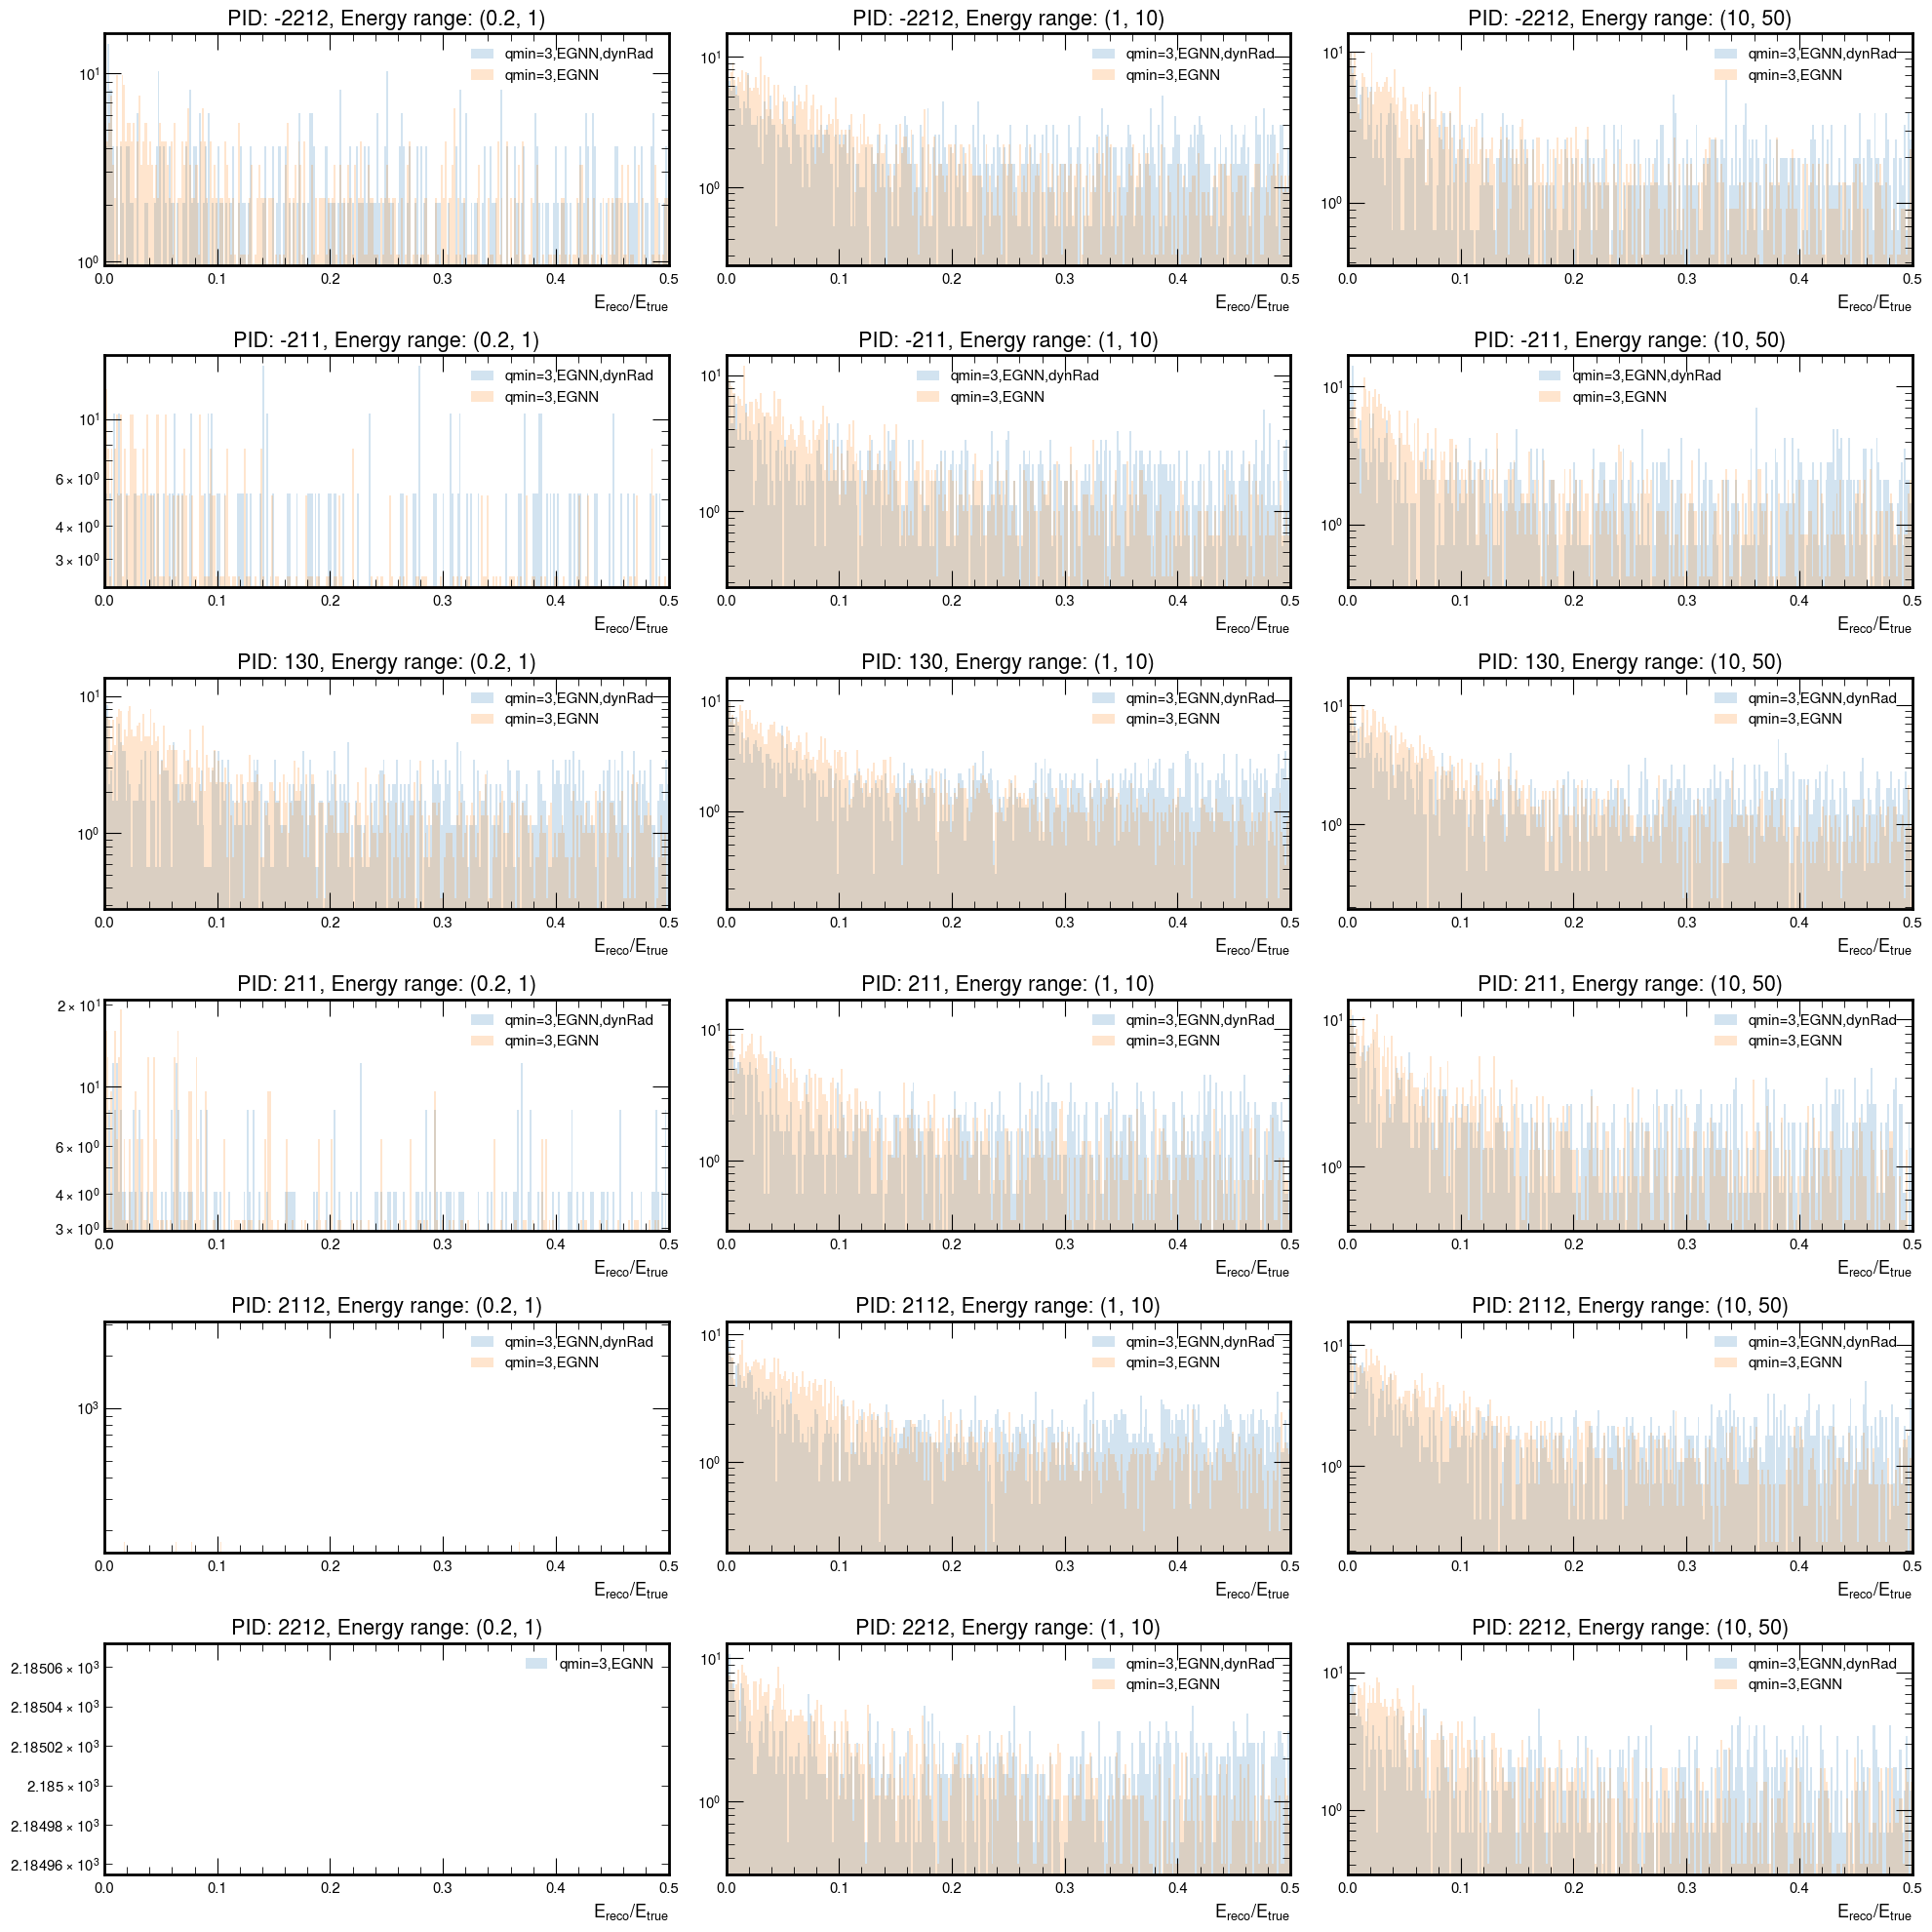

In [129]:
fig, ax = plt.subplots(num_pids, num_ranges, figsize=(20, 20))

intervals = {}
sigmas = {}

def clip(data, n, remove=False):
    if remove:
        return [x for x in data if x < n]
    else:
        return [x if x < n else n for x in data]

for key, val in e_frac_per_pid_and_range.items():
    for i, pid in enumerate(val.keys()):
        for j, r in enumerate(ranges):
            data = val[pid][r]
            if len(data):
                median, mean = np.median(data),  data.mean()
                interval_68 = getEffSigma(data, percentage=0.683, bins=300)
                # print(data[0], interval_68)
                sigma = interval_68[0]
                interval_68 = [interval_68[1], interval_68[2]]
                datac = clip(data, 0.5, remove=True)
                ax[i, j].hist(datac, bins=300, label=key, alpha=0.2, density=True)
                ax[i, j].set_xlim([0, 0.5])
                #ax[i, j].axvline(median, color="red", label="Median")
                #ax[i, j].axvline(mean, color="green", label="Mean")
                ax[i, j].set_yscale("log")
                #ax[i, j].axvline(interval_68[0], color="orange", label="68% interval")
                #ax[i, j].axvline(interval_68[1], color="orange")
                # shaded 68% interval
                #ax[i, j].axvspan(interval_68[0], interval_68[1], 0, 5, color="orange", alpha=0.2)
                sigmas[(pid, r)] = sigma
                intervals[(pid, r)] = interval_68
                ax[i, j].legend()
            ax[i, j].set_xlabel("$E_{reco} / E_{true}$")
            ax[i, j].set_title(f"PID: {pid}, Energy range: {r}")


fig.tight_layout()
fig.show()
#fig.savefig("/eos/user/g/gkrzmanc/summ_results/frac_energy_plots/24082023_plots/part_plots_more_stat.pdf")
#fig.savefig("/eos/user/g/gkrzmanc/summ_results/frac_energy_plots/23082023_plots/plot_with_known_particle_match_NOT_known_part.pdf")
print(sigmas)
#fig.savefig("/eos/user/g/gkrzmanc/summ_results/frac_energy_plots/27082023/plt_resolution_more_28082023_knownpart_linscale.pdf")

In [126]:
fig.savefig("/eos/user/g/gkrzmanc/summ_results/frac_energy_plots/27082023/plt_resolution_more_28082023_knownpart_dynradius_comp.pdf")

[] []


KeyError: 'part_PID_true'

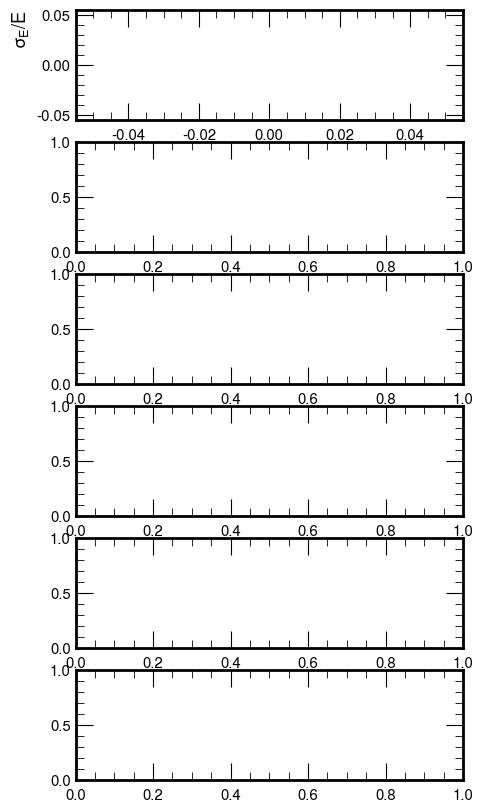

In [124]:
fig, ax = plt.subplots(num_pids, 1, figsize=(5, 10))
for i, pid in enumerate(e_frac_per_pid_and_range.keys()):
    sigmas1, energies = [], []
    #sigmas = [intervals[(pid, r)] for r in ranges]
    #energies = [r[1] for r in ranges]
    for j in range(len(ranges)):
        #print(ranges[j])
        if (pid, ranges[j]) in intervals:
            sigmas1.append(sigmas[(pid, ranges[j])])
            energies.append(ranges[j][1])
    print(energies, sigmas1)
    ax[i].plot(energies, sigmas1, ".-", color="red")
    ax[i].set_xlabel("E")
    ax[i].set_ylabel("$\sigma_E/E$")
    ax[i].set_title(f"PID: {pid} (N={sum(result['part_PID_true'] == pid)})")
    ax[i].set_xscale("log")
    ax[i].grid()
    ax[i].set_ylim([0, 0.5])
fig.tight_layout()
fig.show()
#fig.savefig("/eos/user/g/gkrzmanc/summ_results/frac_energy_plots/23082023_plots/sigma_vs_energy_with_known_particle_match_range.pdf")


findfont: Generic family 'sans-serif' not found because none of the following families were found: TeX Gyre Heros, Helvetica, Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: TeX Gyre Heros, Helvetica, Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: TeX Gyre Heros, Helvetica, Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: TeX Gyre Heros, Helvetica, Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: TeX Gyre Heros, Helvetica, Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: TeX Gyre Heros, Helvetica, Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: TeX Gyre Heros, Helvetica, Arial
findfont: Generic family 'sans-serif' not found because none of the followin

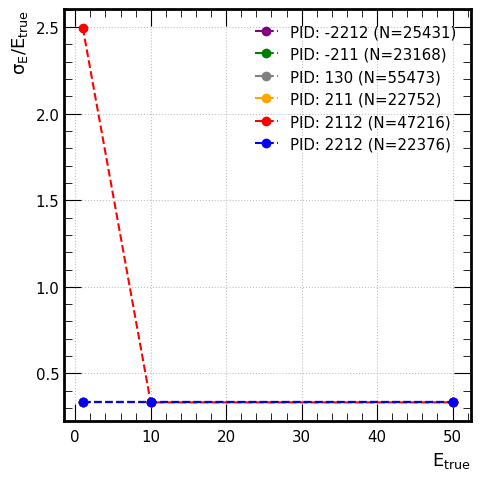

In [188]:
fig, ax = plt.subplots(figsize=(5, 5))

for i, pid in enumerate(e_frac_per_pid_and_range.keys()):
    sigmas1, energies = [], []
    for j in range(len(ranges)):
        if (pid, ranges[j]) in intervals:
            sigmas1.append(sigmas[(pid, ranges[j])])
            energies.append(ranges[j][1])
    #print(energies, sigmas)
    ax.plot(energies, sigmas1, "o--", color=particle_colors[pid.item()], label="PID: " + str(pid.item()) + " (N=" + str(sum(result['part_PID_true'] == pid).item()) + ")")
ax.set_xlabel("$E_{true}$")
ax.set_ylabel("$\sigma_E/E_{true}$")
ax.legend()
ax.grid()
#ax.set_ylim([0.35, 0.45])
fig.tight_layout()
fig.show()
fig.savefig("/eos/user/g/gkrzmanc/summ_results/frac_energy_plots/24082023_plots/sigma_vs_energy_eff1_morestat.pdf")


In [84]:
list(sigmas.values())

[0.2,
 0.4,
 0.4,
 0.2,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4]

In [86]:
intervals.values()

dict_values([[0.2, 1.0], [0.2, 1.0], [0.2, 1.0], [0.2, 1.0], [0.2, 1.0], [0.2, 1.0], [0.2, 1.0], [0.2, 1.0], [0.2, 1.0], [0.2, 1.0], [0.2, 1.0], [0.2, 1.0], [0.2, 1.0], [0.2, 1.0], [0.2, 1.0], [0.2, 1.0], [0.2, 1.0], [0.2, 1.0]])

In [ ]:
fig, ax = plt.subplots(num_pids, num_ranges, figsize=(20, 20))

intervals = {}
sigmas = {}

def clip(data, n):
    return [x if x < n else n for x in data]

for key in ["qmin=0.5,EGNN"]:
    for i, pid in enumerate(result[key].keys()):
        for j, r in enumerate(ranges):
            data = val[pid][r]
            if len(data):
                median, mean = np.median(data),  data.mean()
                interval_68 = getEffSigma(data, percentage=0.683, bins=300)
                sigma = interval_68[0]
                interval_68 = [interval_68[1], interval_68[2]]
                data = clip(data, 5)
                ax[i, j].hist(data, bins=300, label="pretend to know particles", alpha=0.2, density=True, color="blue")
                ax[i, j].hist(data, bins=300, label="pretend to not know particles", alpha=0.2, density=True, color="red")
                ax[i, j].set_xlim([0, 5])
                ax[i, j].set_yscale("log")
                # shaded 68% interval
                sigmas[(pid, r)] = sigma
                intervals[(pid, r)] = interval_68
                ax[i, j].legend()
            ax[i, j].set_xlabel("$E_{reco} / E_{true}$")
            ax[i, j].set_title(f"PID: {pid}, Energy range: {r}")


fig.tight_layout()
fig.show()
#fig.savefig("/eos/user/g/gkrzmanc/summ_results/frac_energy_plots/24082023_plots/part_plots_more_stat.pdf")
#fig.savefig("/eos/user/g/gkrzmanc/summ_results/frac_energy_plots/23082023_plots/plot_with_known_particle_match_NOT_known_part.pdf")
print(sigmas)
fig.savefig("/eos/user/g/gkrzmanc/summ_results/frac_energy_plots/27082023/plt_resol_pt3qmin05.pdf")



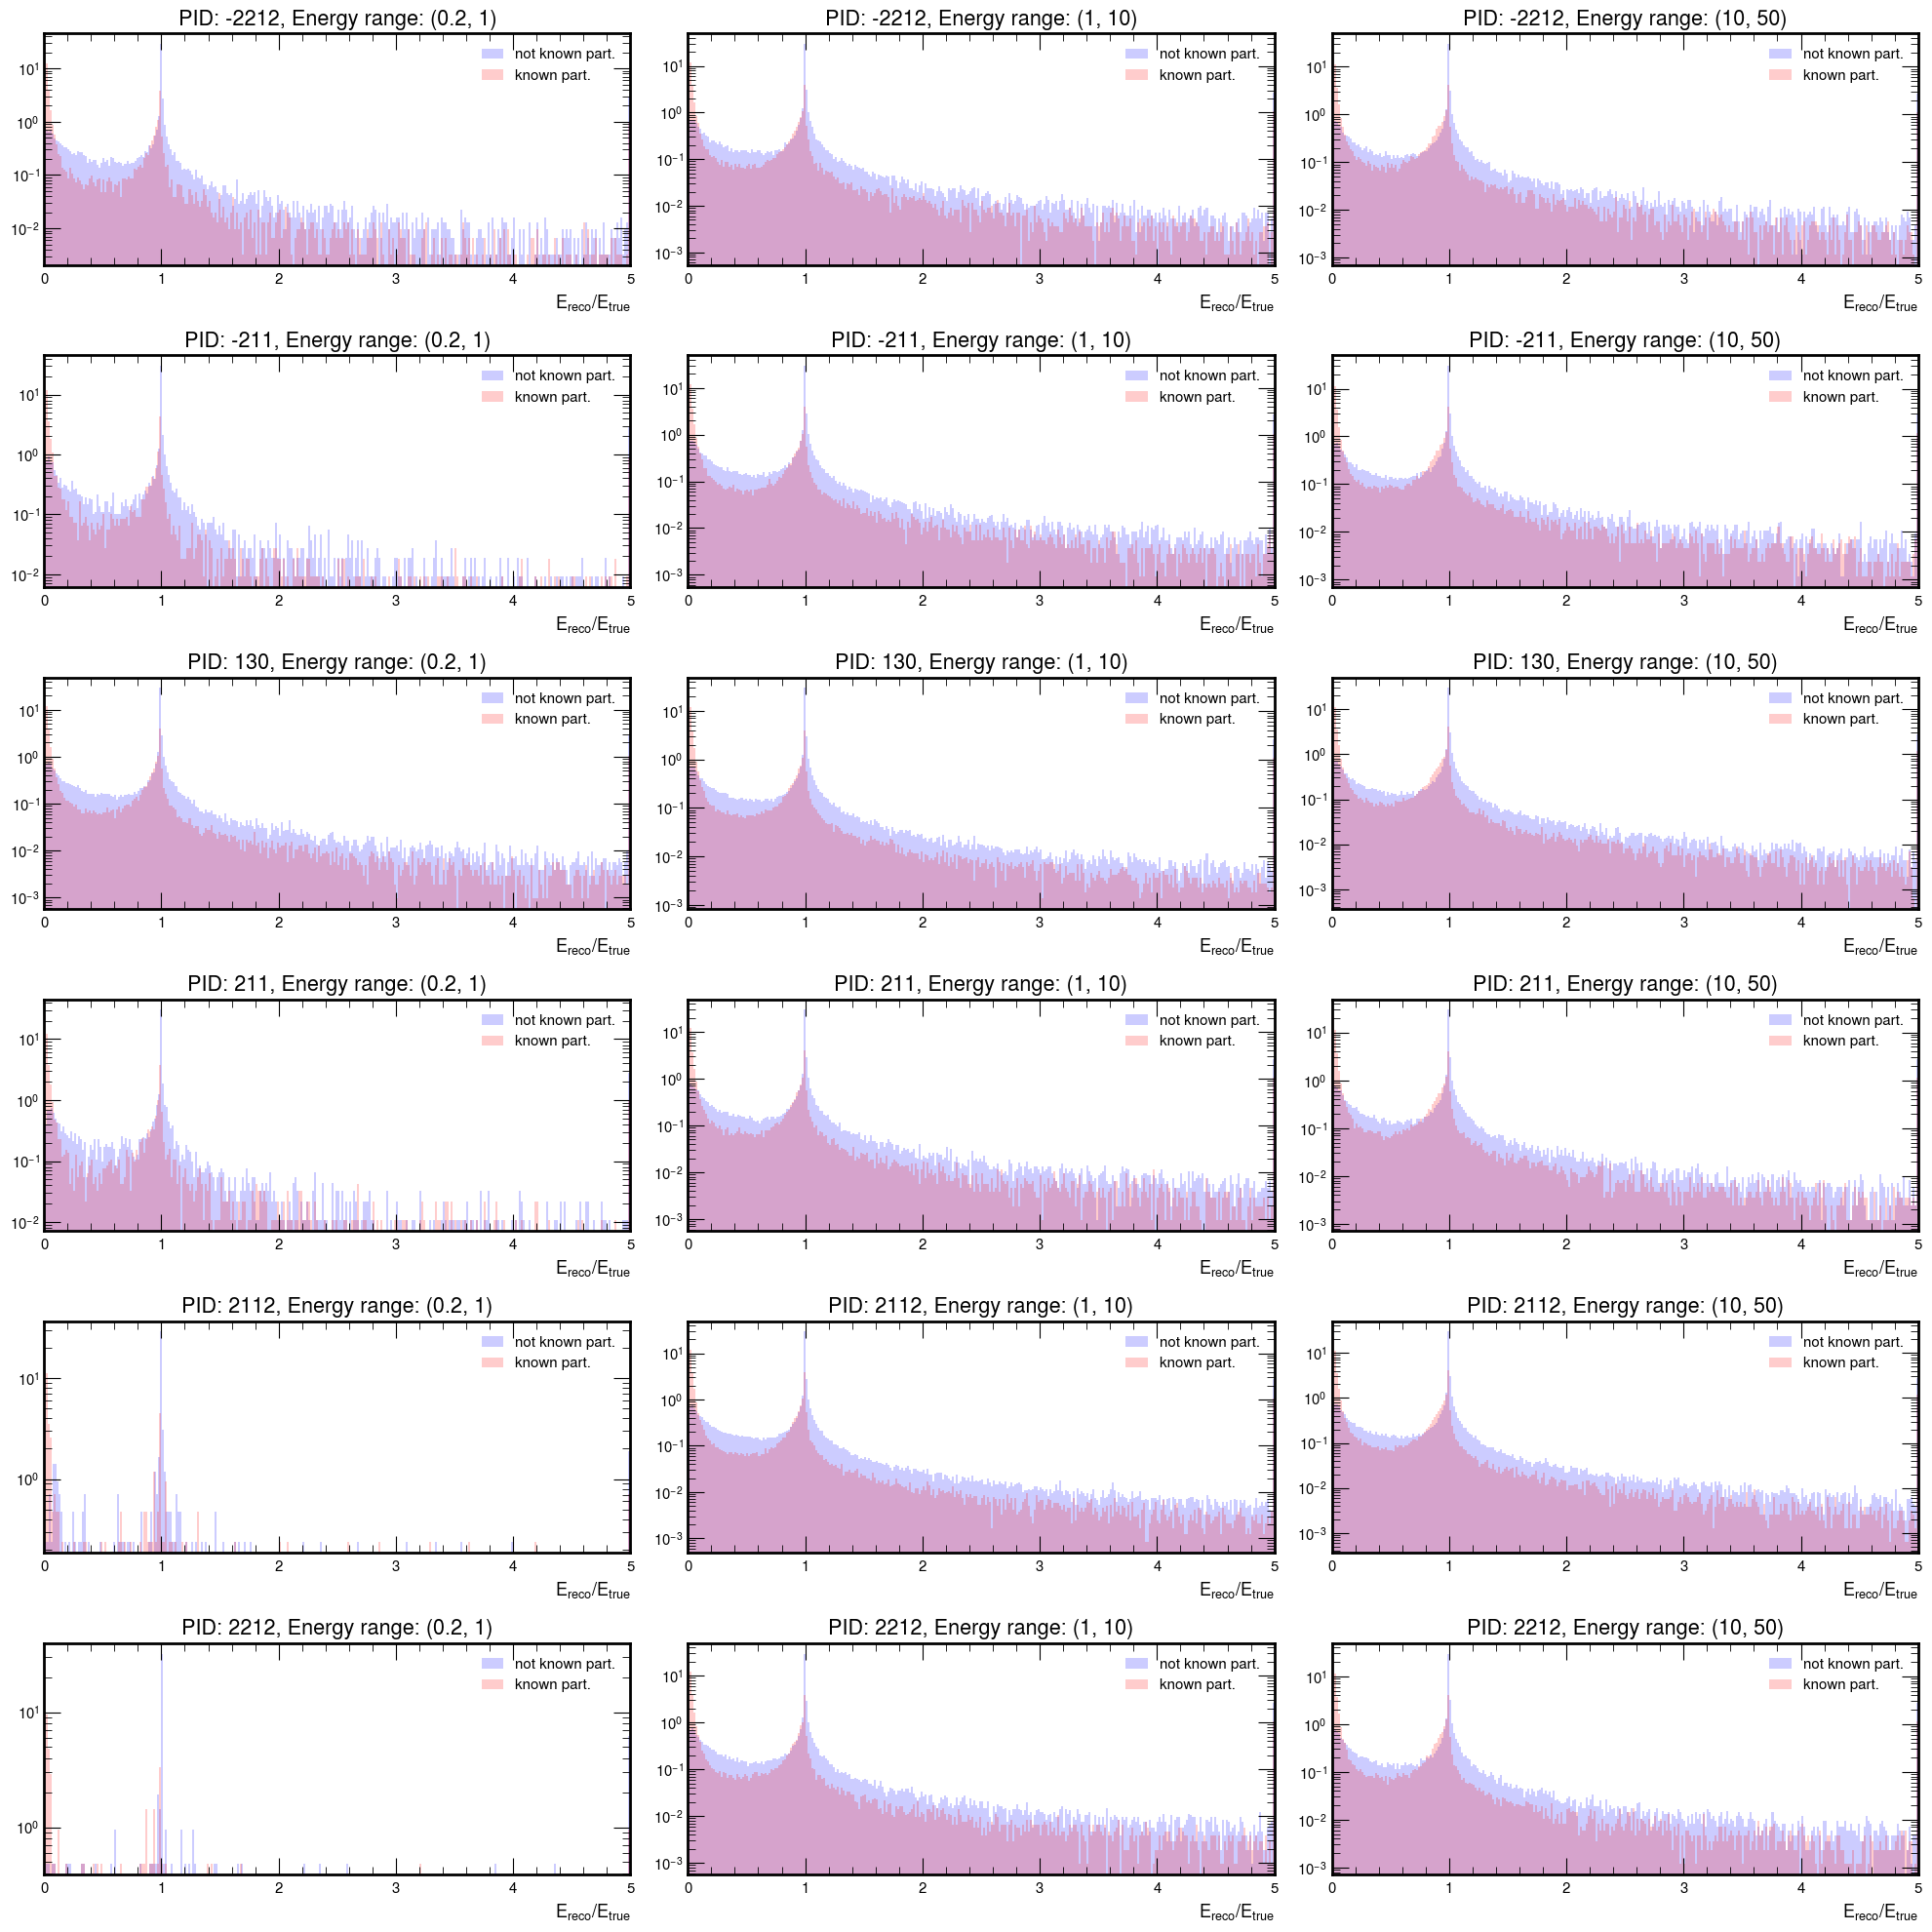

In [104]:
fig, ax = plt.subplots(num_pids, num_ranges, figsize=(20, 20))

intervals = {}
sigmas = {}

def clip(data, n):
    return [x if x < n else n for x in data]

for key in ["qmin=0.5,EGNN"]:
    val = e_frac_per_pid_and_range[key]
    val_knownpart = e_frac_per_pid_and_range_knownpart[key]
    for i, pid in enumerate(val.keys()):
        for j, r in enumerate(ranges):
            data = val[pid][r]
            data_knownpart = val_knownpart[pid][r]
            if len(data):
                median, mean = np.median(data), data.mean()
                interval_68 = getEffSigma(data, percentage=0.683, bins=300)
                # print(data[0], interval_68)
                sigma = interval_68[0]
                interval_68 = [interval_68[1], interval_68[2]]
                data = clip(data, 5)
                data_knownpart=clip(data_knownpart, 5)
                ax[i, j].hist(data, bins=300, label="known part.", alpha=0.2, density=True, color="blue")
                ax[i, j].hist(data_knownpart, bins=300, label="not known part.", alpha=0.2, density=True, color="red")
                ax[i, j].set_xlim([0, 5])
                #ax[i, j].axvline(median, color="red", label="Median")
                #ax[i, j].axvline(mean, color="green", label="Mean")
                ax[i, j].set_yscale("log")
                #ax[i, j].axvline(interval_68[0], color="orange", label="68% interval")
                #ax[i, j].axvline(interval_68[1], color="orange")
                # shaded 68% interval
                #ax[i, j].axvspan(interval_68[0], interval_68[1], 0, 5, color="orange", alpha=0.2)
                sigmas[(pid, r)] = sigma
                intervals[(pid, r)] = interval_68
                ax[i, j].legend()
            ax[i, j].set_xlabel("$E_{reco} / E_{true}$")
            ax[i, j].set_title(f"PID: {pid}, Energy range: {r}")


fig.tight_layout()
fig.show()
#fig.savefig("/eos/user/g/gkrzmanc/summ_results/frac_energy_plots/24082023_plots/part_plots_more_stat.pdf")
#fig.savefig("/eos/user/g/gkrzmanc/summ_results/frac_energy_plots/23082023_plots/plot_with_known_particle_match_NOT_known_part.pdf")
#print(sigmas)
#fig.savefig("/eos/user/g/gkrzmanc/summ_results/frac_energy_plots/27082023/plt_resolution.pdf")

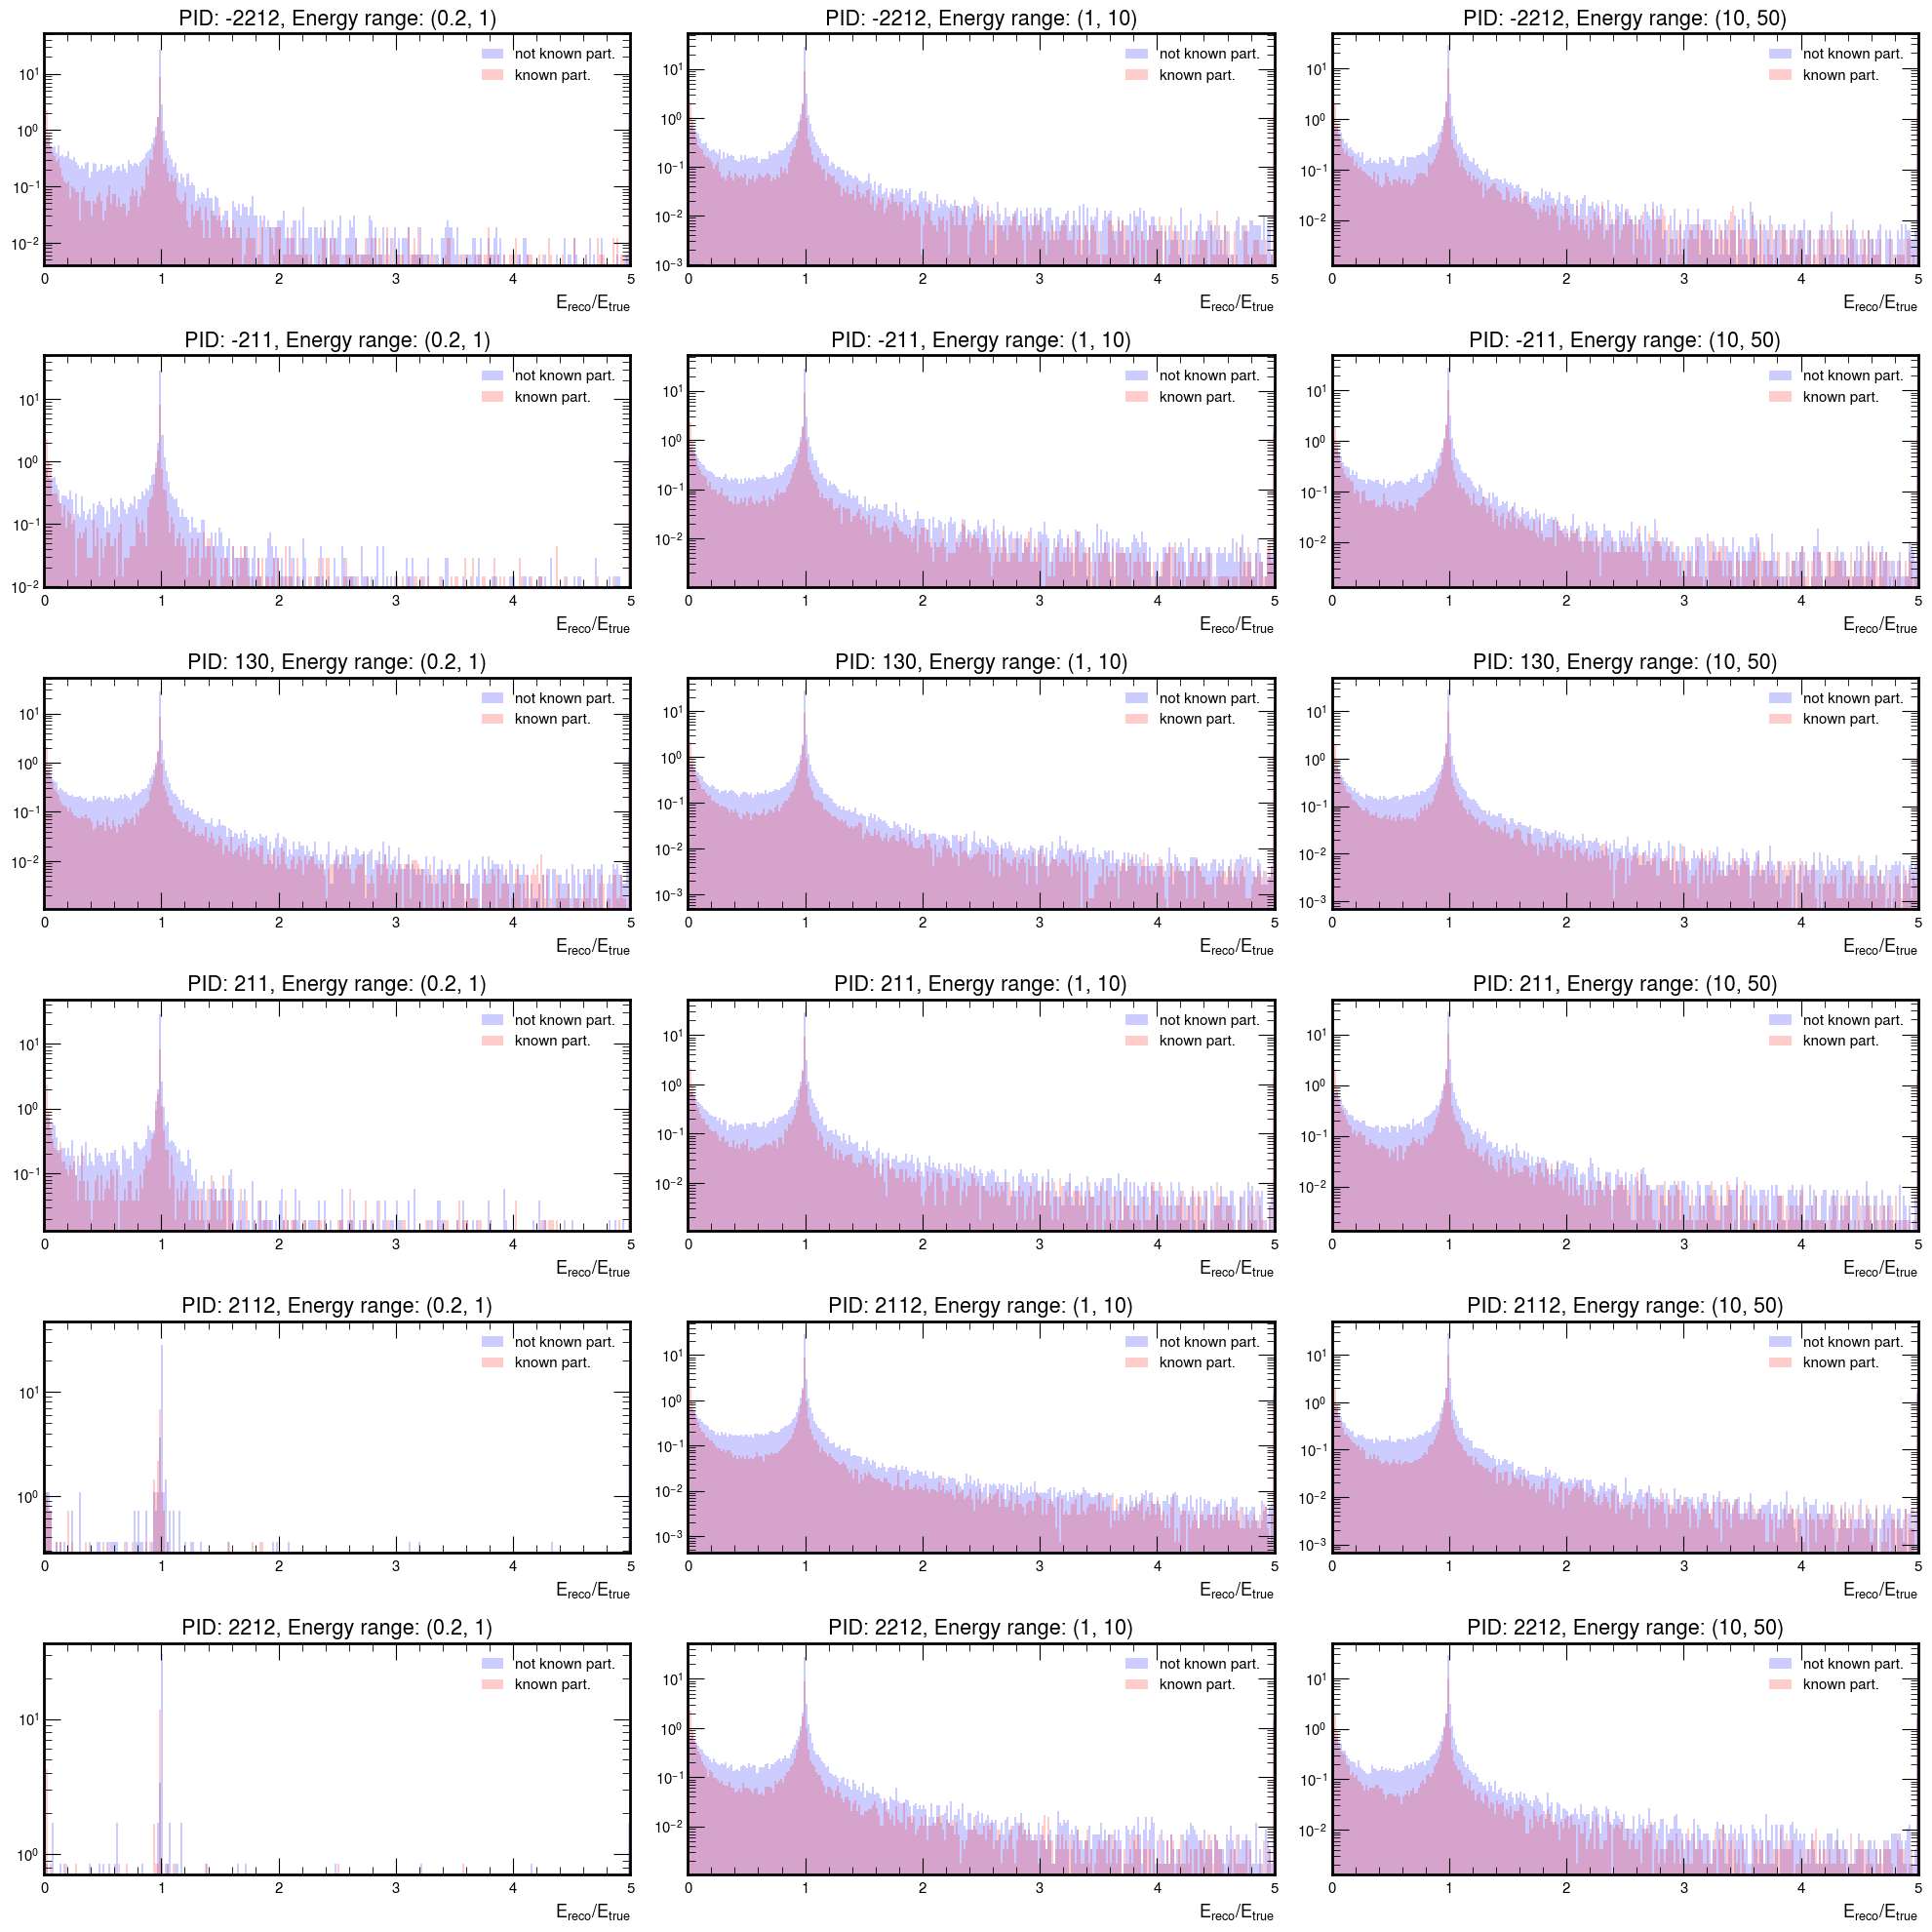

In [106]:
fig, ax = plt.subplots(num_pids, num_ranges, figsize=(20, 20))

intervals = {}
sigmas = {}

def clip(data, n):
    return [x if x < n else n for x in data]

for key in ["qmin=3,EGNN+GAT"]:
    val = e_frac_per_pid_and_range[key]
    val_knownpart = e_frac_per_pid_and_range_knownpart[key]
    for i, pid in enumerate(val.keys()):
        for j, r in enumerate(ranges):
            data = val[pid][r]
            data_knownpart = val_knownpart[pid][r]
            if len(data):
                median, mean = np.median(data), data.mean()
                interval_68 = getEffSigma(data, percentage=0.683, bins=300)
                # print(data[0], interval_68)
                sigma = interval_68[0]
                interval_68 = [interval_68[1], interval_68[2]]
                data = clip(data, 5)
                data_knownpart=clip(data_knownpart, 5)
                ax[i, j].hist(data, bins=300, label="not known part.", alpha=0.2, density=True, color="blue")
                ax[i, j].hist(data_knownpart, bins=300, label="known part.", alpha=0.2, density=True, color="red")
                ax[i, j].set_xlim([0, 5])
                #ax[i, j].axvline(median, color="red", label="Median")
                #ax[i, j].axvline(mean, color="green", label="Mean")
                ax[i, j].set_yscale("log")
                #ax[i, j].axvline(interval_68[0], color="orange", label="68% interval")
                #ax[i, j].axvline(interval_68[1], color="orange")
                # shaded 68% interval
                #ax[i, j].axvspan(interval_68[0], interval_68[1], 0, 5, color="orange", alpha=0.2)
                sigmas[(pid, r)] = sigma
                intervals[(pid, r)] = interval_68
                ax[i, j].legend()
            ax[i, j].set_xlabel("$E_{reco} / E_{true}$")
            ax[i, j].set_title(f"PID: {pid}, Energy range: {r}")


fig.tight_layout()
fig.show()
#fig.savefig("/eos/user/g/gkrzmanc/summ_results/frac_energy_plots/24082023_plots/part_plots_more_stat.pdf")
#fig.savefig("/eos/user/g/gkrzmanc/summ_results/frac_energy_plots/23082023_plots/plot_with_known_particle_match_NOT_known_part.pdf")
#print(sigmas)
#fig.savefig("/eos/user/g/gkrzmanc/summ_results/frac_energy_plots/27082023/plt_resolution.pdf")

In [105]:
e_frac_per_pid_and_range.keys()

dict_keys(['qmin=3,EGNN', 'qmin=0.5,pretrained_qmin=3,EGNN', 'qmin=0.5,EGNN', 'qmin=3,EGNN+GAT'])